In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!cp "/content/gdrive/My Drive/Urdu_mnist/img_pixels.csv"  "/content/"

In [0]:
col_names=[]
for i in range(0,784):
  col_names.append("Pixel_"+str(i))
col_names.append("Value")

In [0]:
import numpy as np
import pandas as pd 

In [0]:
data=pd.read_csv("/content/img_pixels_with_header.csv")

In [0]:
data=pd.DataFrame(data)

In [0]:
import numpy as np 
import pandas as pd 
import sklearn 

In [7]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
data.corr()

,Unnamed: 0,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,Pixel_38,...,Pixel_745,Pixel_746,Pixel_747,Pixel_748,Pixel_749,Pixel_750,Pixel_751,Pixel_752,Pixel_753,Pixel_754,Pixel_755,Pixel_756,Pixel_757,Pixel_758,Pixel_759,Pixel_760,Pixel_761,Pixel_762,Pixel_763,Pixel_764,Pixel_765,Pixel_766,Pixel_767,Pixel_768,Pixel_769,Pixel_770,Pixel_771,Pixel_772,Pixel_773,Pixel_774,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,Value
Unnamed: 0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000982,-0.000821,-0.001226,NaN,-0.000927,-0.001803,-0.001213,NaN,NaN,-0.005832,-0.005832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001126,-0.004630,-0.005674,-0.004977,-0.006502,...,0.028934,0.039486,0.039400,0.036902,0.025860,0.017702,0.013019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003203,-0.001374,-0.001590,0.004593,0.002601,0.007037,0.007243,0.009867,0.010971,0.009569,0.006985,NaN,NaN,NaN,NaN,NaN,NaN,-0.994987
Pixel_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pixel_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pixel_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pixel_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pixel_780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pixel_781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pixel_782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pixel_783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [0]:
import matplotlib.pyplot as plt

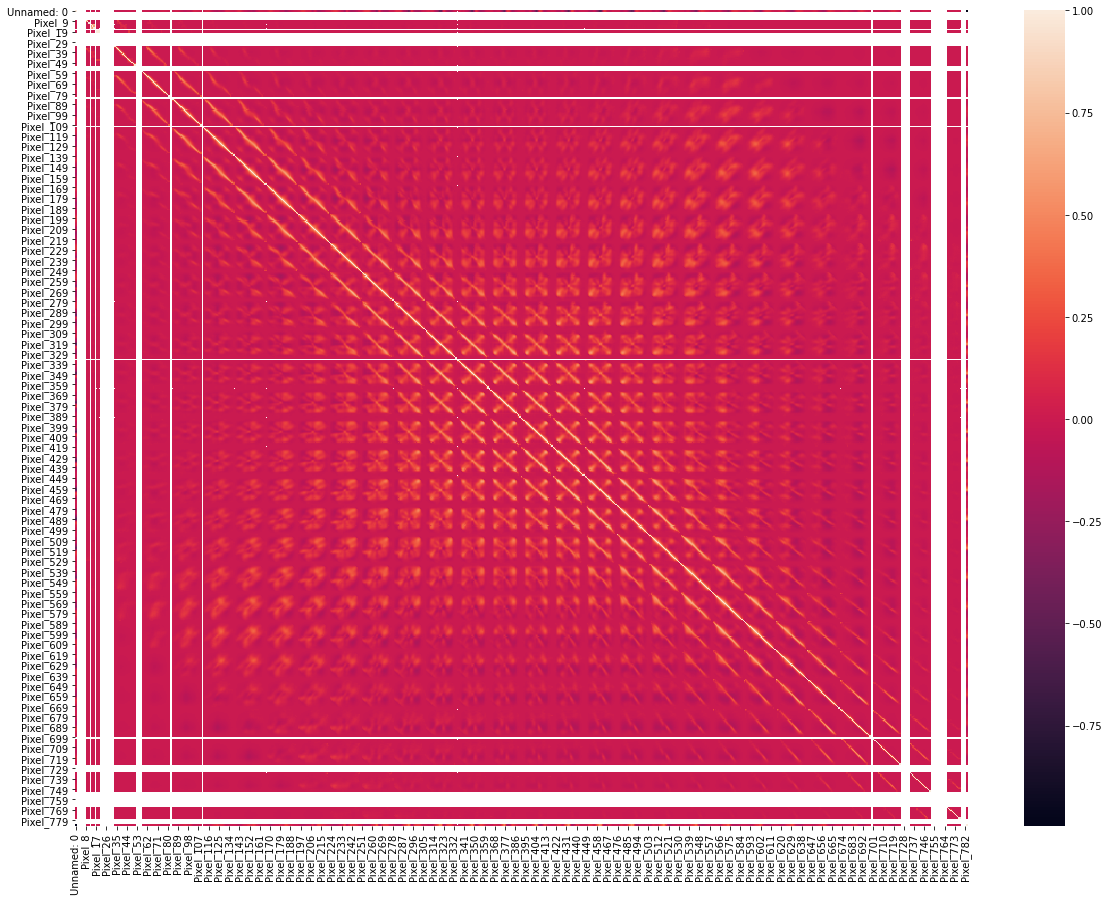

In [11]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(data.corr())

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df=data.sample(frac=1).reset_index(drop=True)

In [35]:
df

,Unnamed: 0,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,Pixel_38,...,Pixel_745,Pixel_746,Pixel_747,Pixel_748,Pixel_749,Pixel_750,Pixel_751,Pixel_752,Pixel_753,Pixel_754,Pixel_755,Pixel_756,Pixel_757,Pixel_758,Pixel_759,Pixel_760,Pixel_761,Pixel_762,Pixel_763,Pixel_764,Pixel_765,Pixel_766,Pixel_767,Pixel_768,Pixel_769,Pixel_770,Pixel_771,Pixel_772,Pixel_773,Pixel_774,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,Value
0,22058,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,64817,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,49560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,30721,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,61583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,27000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
69996,22430,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
69997,21294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
69998,36015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [16]:
X.shape
y.shape

(70000,)

In [0]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [40]:
X.head()

,Unnamed: 0,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,Pixel_38,...,Pixel_744,Pixel_745,Pixel_746,Pixel_747,Pixel_748,Pixel_749,Pixel_750,Pixel_751,Pixel_752,Pixel_753,Pixel_754,Pixel_755,Pixel_756,Pixel_757,Pixel_758,Pixel_759,Pixel_760,Pixel_761,Pixel_762,Pixel_763,Pixel_764,Pixel_765,Pixel_766,Pixel_767,Pixel_768,Pixel_769,Pixel_770,Pixel_771,Pixel_772,Pixel_773,Pixel_774,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783
0,20458,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,61084,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,49991,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,59807,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,7340,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [41]:
y.head()

0    7
1    1
2    2
3    1
4    8
Name: Value, dtype: int64

In [0]:
X=X.replace(1,5)
X=X.replace(0,1)
X=X.replace(5,0)

In [0]:
result=pd.concat([X,y], axis=1)

In [0]:
result.to_csv("dataset_main.csv")

In [0]:
!cp /content/dataset_main.csv   "/content/gdrive/My Drive/Urdu_mnist"

In [0]:
data=pd.read_csv("/content/dataset_main.csv")

In [0]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [53]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,...,Pixel_745,Pixel_746,Pixel_747,Pixel_748,Pixel_749,Pixel_750,Pixel_751,Pixel_752,Pixel_753,Pixel_754,Pixel_755,Pixel_756,Pixel_757,Pixel_758,Pixel_759,Pixel_760,Pixel_761,Pixel_762,Pixel_763,Pixel_764,Pixel_765,Pixel_766,Pixel_767,Pixel_768,Pixel_769,Pixel_770,Pixel_771,Pixel_772,Pixel_773,Pixel_774,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,Value
0,0,20458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
1,1,61084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,49991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,3,59807,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,7340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [0]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=7)

In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [0]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [60]:
model=CatBoostClassifier(iterations=100, depth=4, learning_rate=0.1)
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)
regr = RandomForestClassifier(max_depth=1)
regr.fit(X_train,y_train)
y_predict_regr=regr.predict(X_test)
mse_regr=accuracy_score(y_predict_regr,y_test)
print("raindom forest",mse_regr)
svc2 = SVC(kernel='rbf')
svc2.fit(X_train, y_train)
y_pred_svc2=svc2.predict(X_test)
msesvc=accuracy_score(y_pred_svc2,y_test)
print("svm",msesvc)
regrada = AdaBoostClassifier(random_state=0, n_estimators=100)
regrada.fit(X_train,y_train)
y_predict_regrada=regrada.predict(X_test)
mseada=accuracy_score(y_predict_regrada,y_test)
print("ada",mseada)
xb=XGBClassifier()
xb.fit(X_train,y_train)
y_predict_xb=xb.predict(X_test)
msexb=accuracy_score(y_predict_xb,y_test)
print("XB",msexb)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0615010	test: 2.0612862	best: 2.0612862 (0)	total: 413ms	remaining: 40.9s
1:	learn: 1.8944069	test: 1.8943097	best: 1.8943097 (1)	total: 839ms	remaining: 41.1s
2:	learn: 1.7612757	test: 1.7606782	best: 1.7606782 (2)	total: 1.27s	remaining: 41.1s
3:	learn: 1.6534133	test: 1.6523675	best: 1.6523675 (3)	total: 1.68s	remaining: 40.4s
4:	learn: 1.5581601	test: 1.5577380	best: 1.5577380 (4)	total: 2.14s	remaining: 40.7s
5:	learn: 1.4796062	test: 1.4793228	best: 1.4793228 (5)	total: 2.56s	remaining: 40.1s
6:	learn: 1.4078543	test: 1.4074503	best: 1.4074503 (6)	total: 2.97s	remaining: 39.5s
7:	learn: 1.3435736	test: 1.3437202	best: 1.3437202 (7)	total: 3.39s	remaining: 38.9s
8:	learn: 1.2862404	test: 1.2865267	best: 1.2865267 (8)	total: 3.79s	remaining: 38.4s
9:	learn: 1.2280468	test: 1.2291603	best: 1.2291603 (9)	total: 4.23s	remaining: 38s
10:	learn: 1.1794181	test: 1.1802566	best: 1.1802566 (10)	total: 4.64s	remaining: 37.5s
11:	learn: 1.1353060	test: 1.1364971	best: 1.1364971 (

In [72]:
regr = RandomForestClassifier(max_depth=12, random_state=0, n_estimators=100)
regr.fit(X_train,y_train)
y_predict_regr=regr.predict(X_test)
mse_regr=accuracy_score(y_predict_regr,y_test)
print("raindom forest",mse_regr)
print("Classifcation report ", classification_report(y_test,y_predict_regr, labels=[0,1,2,3,4,5,6,7,8,9]))

raindom forest 0.9871428571428571
Classifcation report                precision    recall  f1-score   support

           0       0.99      0.98      0.99      2135
           1       0.98      1.00      0.99      2109
           2       0.99      0.99      0.99      2092
           3       0.98      0.98      0.98      2121
           4       0.99      0.98      0.99      2042
           5       0.98      0.98      0.98      2120
           6       0.99      0.99      0.99      2134
           7       0.99      0.99      0.99      2035
           8       0.99      0.98      0.99      2111
           9       0.99      1.00      0.99      2101

    accuracy                           0.99     21000
   macro avg       0.99      0.99      0.99     21000
weighted avg       0.99      0.99      0.99     21000



In [77]:
#model=CatBoostClassifier(iterations=100, depth=4, learning_rate=0.1)
#model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)
y_predict_catboost=model.predict(X_test)
acc_catboost=accuracy_score(y_predict_catboost,y_test)
print("CatBoost",acc_catboost)
print("Classifcation report ", classification_report(y_test,y_predict_catboost, labels=[0,1,2,3,4,5,6,7,8,9]))

CatBoost 0.9547619047619048
Classifcation report                precision    recall  f1-score   support

           0       0.98      0.95      0.96      2135
           1       0.94      0.98      0.96      2109
           2       0.96      0.95      0.96      2092
           3       0.93      0.95      0.94      2121
           4       0.95      0.94      0.95      2042
           5       0.96      0.95      0.95      2120
           6       0.96      0.96      0.96      2134
           7       0.96      0.97      0.97      2035
           8       0.96      0.95      0.96      2111
           9       0.94      0.94      0.94      2101

    accuracy                           0.95     21000
   macro avg       0.95      0.95      0.95     21000
weighted avg       0.95      0.95      0.95     21000



In [78]:
svc2 = SVC(kernel='rbf')
svc2.fit(X_train, y_train)
y_pred_svc2=svc2.predict(X_test)
svc_acc=accuracy_score(y_pred_svc2,y_test)
print("svm",svc_acc)
print("Classifcation report ", classification_report(y_test,y_pred_svc2, labels=[0,1,2,3,4,5,6,7,8,9]))

svm 0.9962857142857143
Classifcation report                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2135
           1       0.99      1.00      1.00      2109
           2       1.00      0.99      0.99      2092
           3       0.99      0.99      0.99      2121
           4       0.99      1.00      1.00      2042
           5       1.00      1.00      1.00      2120
           6       1.00      1.00      1.00      2134
           7       0.99      1.00      1.00      2035
           8       1.00      0.99      1.00      2111
           9       1.00      1.00      1.00      2101

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



In [79]:
svc2 = SVC(kernel='linear')
svc2.fit(X_train, y_train)
y_pred_svc2=svc2.predict(X_test)
svc_acc=accuracy_score(y_pred_svc2,y_test)
print("svm",svc_acc)
print("Classifcation report ", classification_report(y_test,y_pred_svc2, labels=[0,1,2,3,4,5,6,7,8,9]))

svm 0.9995714285714286
Classifcation report                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2135
           1       1.00      1.00      1.00      2109
           2       1.00      1.00      1.00      2092
           3       1.00      1.00      1.00      2121
           4       1.00      1.00      1.00      2042
           5       1.00      1.00      1.00      2120
           6       1.00      1.00      1.00      2134
           7       1.00      1.00      1.00      2035
           8       1.00      1.00      1.00      2111
           9       1.00      1.00      1.00      2101

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



In [0]:
from sklearn.linear_model import LogisticRegression


In [84]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_lg=svc2.predict(X_test)
lg_acc=accuracy_score(y_pred_lg,y_test)
print("Logistic Regression",lg_acc)
print("Classifcation report ", classification_report(y_test,y_pred_lg, labels=[0,1,2,3,4,5,6,7,8,9]))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression 0.9995714285714286
Classifcation report                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2135
           1       1.00      1.00      1.00      2109
           2       1.00      1.00      1.00      2092
           3       1.00      1.00      1.00      2121
           4       1.00      1.00      1.00      2042
           5       1.00      1.00      1.00      2120
           6       1.00      1.00      1.00      2134
           7       1.00      1.00      1.00      2035
           8       1.00      1.00      1.00      2111
           9       1.00      1.00      1.00      2101

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



In [0]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [0]:
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [112]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [123]:
nb_classes = 10
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(nb_classes, activation='softmax'))

model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.optimizers import Adam ,RMSprop

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history=model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [121]:
X_train.head()

,Unnamed: 0,Unnamed: 0.1,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,...,Pixel_744,Pixel_745,Pixel_746,Pixel_747,Pixel_748,Pixel_749,Pixel_750,Pixel_751,Pixel_752,Pixel_753,Pixel_754,Pixel_755,Pixel_756,Pixel_757,Pixel_758,Pixel_759,Pixel_760,Pixel_761,Pixel_762,Pixel_763,Pixel_764,Pixel_765,Pixel_766,Pixel_767,Pixel_768,Pixel_769,Pixel_770,Pixel_771,Pixel_772,Pixel_773,Pixel_774,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783
15645,15645,43350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12362,12362,21020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28559,28559,43746,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20976,20976,4669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2722,2722,41893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#X_test=X_test.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [158]:
history=model.fit(X_train,y_train,batch_size = 10, epochs = 20, validation_data=(X_test, y_test))

Train on 49000 samples, validate on 21000 samples
Epoch 1/20
49000/49000 [==============================] - 17s 348us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0383 - val_accuracy: 0.9871
Epoch 2/20
49000/49000 [==============================] - 17s 341us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0384 - val_accuracy: 0.9871
Epoch 3/20
49000/49000 [==============================] - 17s 350us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0384 - val_accuracy: 0.9871
Epoch 4/20
49000/49000 [==============================] - 17s 348us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0385 - val_accuracy: 0.9871
Epoch 5/20
49000/49000 [==============================] - 17s 349us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0386 - val_accuracy: 0.9871
Epoch 6/20
49000/49000 [==============================] - 17s 348us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0386 - val_accuracy: 0.9871
Epoch 7/20
49000/49000 [========

ValueError: ignored

In [159]:
y_pred_nn=model.predict(X_test)
y_pred_nn=(y_pred_nn>0.5)
nn_acc=accuracy_score(y_pred_nn,y_test)
print("NN Prediction",nn_acc)
print("Classifcation report ", classification_report(y_test,y_pred_nn, labels=[0,1,2,3,4,5,6,7,8,9]))


NN Prediction 0.9871428571428571
Classifcation report                precision    recall  f1-score   support

           0       0.98      0.98      0.98      2135
           1       0.98      0.99      0.99      2109
           2       0.98      0.99      0.99      2092
           3       0.98      0.99      0.99      2121
           4       0.99      0.98      0.99      2042
           5       0.98      0.98      0.98      2120
           6       0.99      0.99      0.99      2134
           7       1.00      0.99      0.99      2035
           8       0.99      0.99      0.99      2111
           9       0.99      0.99      0.99      2101

   micro avg       0.99      0.99      0.99     21000
   macro avg       0.99      0.99      0.99     21000
weighted avg       0.99      0.99      0.99     21000
 samples avg       0.99      0.99      0.99     21000



Text(0.5, 1.0, 'Accuracy Curves')

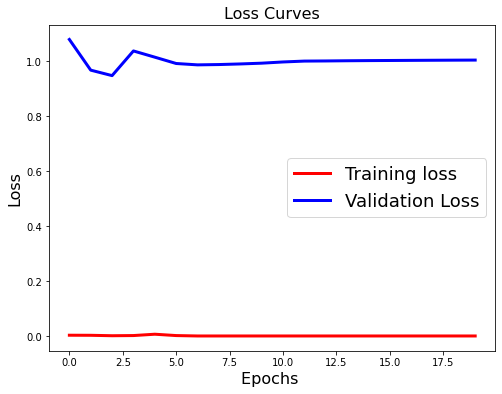

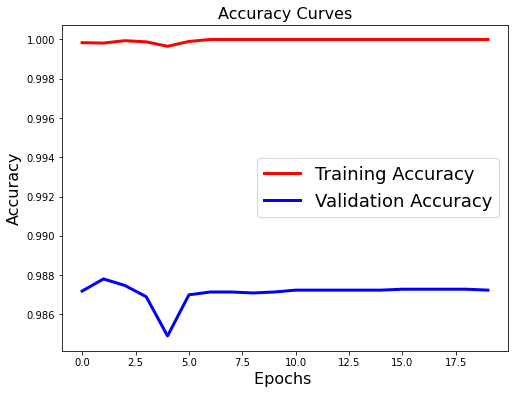

In [133]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Train on 49000 samples, validate on 21000 samples
Epoch 1/20
49000/49000 [==============================] - 17s 356us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0396 - val_accuracy: 0.9871
Epoch 2/20
49000/49000 [==============================] - 17s 350us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0397 - val_accuracy: 0.9871
Epoch 3/20
49000/49000 [==============================] - 17s 347us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0397 - val_accuracy: 0.9871
Epoch 4/20
49000/49000 [==============================] - 17s 348us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0398 - val_accuracy: 0.9871
Epoch 5/20
49000/49000 [==============================] - 17s 345us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0398 - val_accuracy: 0.9871
Epoch 6/20
49000/49000 [==============================] - 17s 348us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0399 - val_accuracy: 0.9871
Epoch 7/20
49000/49000 [========

Text(0.5, 1.0, 'Accuracy Curves')

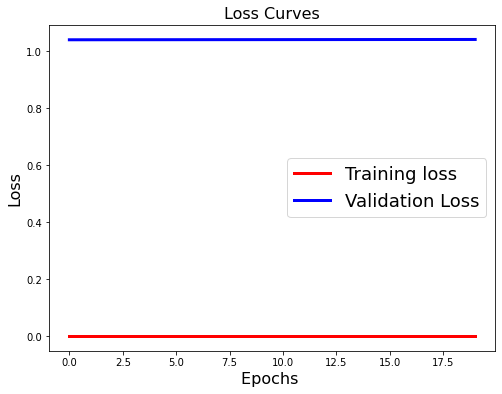

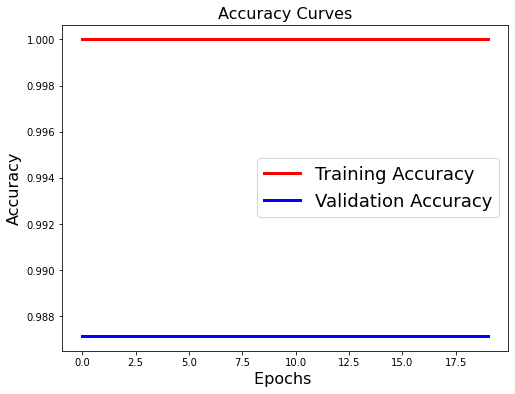

In [160]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train,y_train,batch_size = 10, epochs = 20, validation_data=(X_test, y_test))
y_pred_nn=model.predict(X_test)
y_pred_nn=(y_pred_nn>0.5)
nn_acc=accuracy_score(y_pred_nn,y_test)
print("NN Prediction",nn_acc)
print("Classifcation report ", classification_report(y_test,y_pred_nn, labels=[0,1,2,3,4,5,6,7,8,9]))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
y_true=(y_pred_nn>0.5)

In [0]:
nn_acc=accuracy_score(y_true,y_test)

In [157]:
nn_acc

0.9871428571428571

Train on 49000 samples, validate on 21000 samples
Epoch 1/20
49000/49000 [==============================] - 16s 336us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0413 - val_accuracy: 0.9871
Epoch 2/20
49000/49000 [==============================] - 17s 339us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0418 - val_accuracy: 0.9872
Epoch 3/20
49000/49000 [==============================] - 16s 327us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0423 - val_accuracy: 0.9872
Epoch 4/20
49000/49000 [==============================] - 16s 331us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0427 - val_accuracy: 0.9872
Epoch 5/20
49000/49000 [==============================] - 16s 334us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0432 - val_accuracy: 0.9872
Epoch 6/20
49000/49000 [==============================] - 16s 335us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0436 - val_accuracy: 0.9872
Epoch 7/20
49000/49000 [========

Text(0.5, 1.0, 'Accuracy Curves')

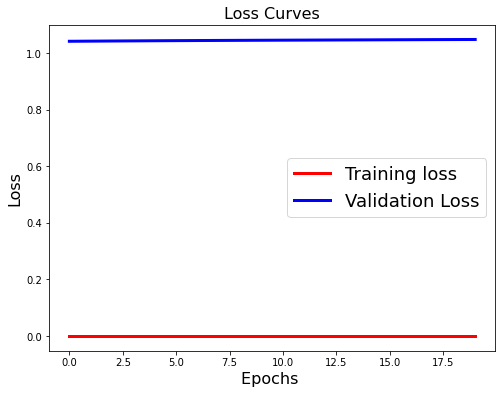

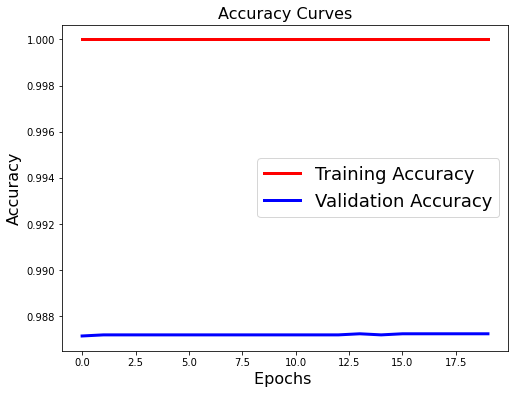

In [161]:
model.compile(optimizer='adagrad',loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train,y_train,batch_size = 10, epochs = 20, validation_data=(X_test, y_test))
y_pred_nn=model.predict(X_test)
y_pred_nn=(y_pred_nn>0.5)
nn_acc=accuracy_score(y_pred_nn,y_test)
print("NN Prediction",nn_acc)
print("Classifcation report ", classification_report(y_test,y_pred_nn, labels=[0,1,2,3,4,5,6,7,8,9]))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Train on 49000 samples, validate on 21000 samples
Epoch 1/20
49000/49000 [==============================] - 15s 313us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0477 - val_accuracy: 0.9872
Epoch 2/20
49000/49000 [==============================] - 15s 313us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0477 - val_accuracy: 0.9872
Epoch 3/20
49000/49000 [==============================] - 15s 308us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0477 - val_accuracy: 0.9872
Epoch 4/20
49000/49000 [==============================] - 15s 310us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0477 - val_accuracy: 0.9872
Epoch 5/20
49000/49000 [==============================] - 15s 313us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0477 - val_accuracy: 0.9872
Epoch 6/20
49000/49000 [==============================] - 15s 310us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0477 - val_accuracy: 0.9872
Epoch 7/20
49000/49000 [========

Text(0.5, 1.0, 'Accuracy Curves')

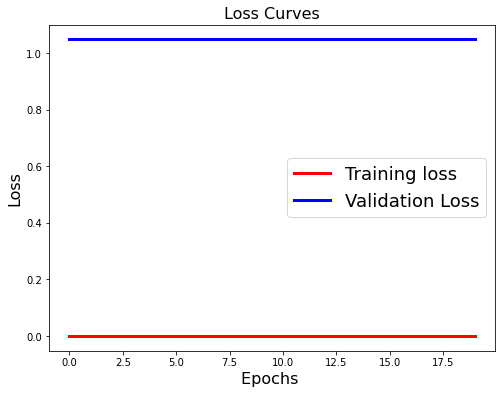

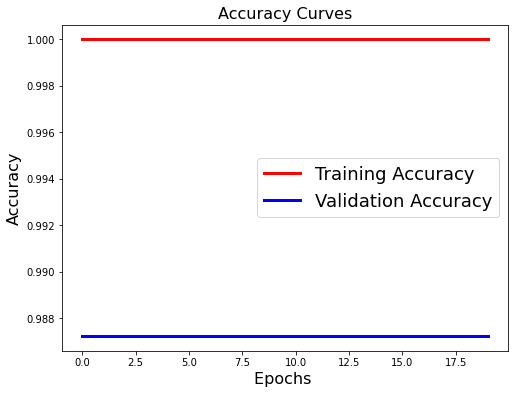

In [162]:
model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train,y_train,batch_size = 10, epochs = 20, validation_data=(X_test, y_test))

y_pred_nn=model.predict(X_test)
y_pred_nn=(y_pred_nn>0.5)
nn_acc=accuracy_score(y_pred_nn,y_test)
print("NN Prediction",nn_acc)
print("Classifcation report ", classification_report(y_test,y_pred_nn, labels=[0,1,2,3,4,5,6,7,8,9]))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
model.save("weights.h5")
